## Project: Investigate a Dataset -[Healthcare Dataset]
Table of content
- Introduction 
- Data Wrangling
- Exploratory data analysis 
- Conclusion


## Introdution

### Dataset Description

> The healthcare dataset to be investigated contains information from over 10k medical records, Each column provides specific information about the patient, their admission, and the healthcare services provided.
Here's a brief explanation of each column in the dataset .

> Name: This column represents the name of the patient associated with the healthcare record.  

>Age: The age of the patient at the time of admission, expressed in years.

>Gender: Indicates the gender of the patient, either "Male" or "Female."

>Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

>Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.

>Date of Admission: The date on which the patient was admitted to the healthcare facility.

>Doctor: The name of the doctor responsible for the patient's care during their admission.

>Hospital: Identifies the healthcare facility or hospital where the patient was admitted.

>Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."

>Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.

>Room Number: The room number where the patient was accommodated during their admission.

>Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.

>Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.

>Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."

>Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.



### Question(s) for the Analysis

1. Which gender has the highest admission rate over the years?
2. Which months have the highest number of admissions each year?
3. Which insurance company has the highest spending?
4. Percentage of Medical condition per Blood Type?
5. What is the most common type of admission hospitals receive?
6. Admisssion type by Test result





### Importing packages to be used

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


### Data Wrangling

> We'll go through the dataset and identify any instances or occurrences that need cleaning and organizing. First, we'll load the dataset into the workspace and then take a look at the data to get an initial understanding.

In [234]:
# loading the data using pandas read_csv function
# We would refer to the variable where the dataframe is loaded into as 'med_df' to better
# reflect the content of the dataframe
med_df = pd.read_csv('healthcare_dataset.csv')
med_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


From the cell above, we can tell that the dataset contains 10000 rows and 15 columns. We can also draw some insights into the wrangling and cleansing procedures we might adopt to make the dataset suitale for analysis. 

 ###### Let's dive deeper into the dataset to explore it more thoroughly and develop effective techniques for cleaning and organizing the data.

In [235]:
# checking for null values and data type of the dataset
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

Looking above, there are no null values in the entire dataset. As for the data types, virtually all the columns are in their appropriate data type except the 'Date of Admission' and 'Discharge Date' columns which are objects instead of dates.

In [236]:
# checking for unique values in each columns
med_df.nunique()

Name                   9378
Age                      68
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1815
Doctor                 9416
Hospital               8639
Insurance Provider        5
Billing Amount        10000
Room Number             400
Admission Type            3
Discharge Date         1834
Medication                5
Test Results              3
dtype: int64

In [237]:
# checking just the headers 
med_df.head(0)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


The column names are correctly spelt and properly capitalized, but we  would like to get rid of the space in between and also convert them all to lower case

## Data Cleaning


Now that we've figured out everything we need to know about our data, let's dive right into cleaning the data. Before we do that, let's outline all the steps that we would be taking so we can reference anytime and also use as a pointer for comppletion:

>1: Drop the 'Doctor', 'Room Number', and 'Doctor' and 'Hospital' columns.

>2: Make all column names lowercase.

>3: Convert the 'Date of Admission' and 'Discharge Date' to data&time data type 



In [238]:
# We would use the pandas drop function 
# and make inplace to be True so the change is registered
# Then we view the changed columns
med_df.drop(columns = ['Room Number','Doctor', 'Hospital'], inplace=True)

In [239]:
med_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,UnitedHealthcare,39606.840083,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Blue Cross,5995.717488,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Blue Cross,49559.202905,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,UnitedHealthcare,25236.344761,Urgent,2020-02-26,Penicillin,Normal


In [240]:
# we would make all columns lower case, assign it back to columns
# and check the columns header
med_df.columns= med_df.columns.str.lower()
med_df.head(0)

,name,age,gender,blood type,medical condition,date of admission,insurance provider,billing amount,admission type,discharge date,medication,test results


In [241]:
# we would use the dataframe replace function to replace all spaces in the columns names with '_'
# assign it back to columns and check the columns header 
med_df.columns = med_df.columns.str.replace(' ', '_')
med_df

,name,age,gender,blood_type,medical_condition,date_of_admission,insurance_provider,billing_amount,admission_type,discharge_date,medication,test_results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,UnitedHealthcare,39606.840083,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Blue Cross,5995.717488,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Blue Cross,49559.202905,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,UnitedHealthcare,25236.344761,Urgent,2020-02-26,Penicillin,Normal


In [242]:
# converting the 'date_of_admission' and 'discharge_date' into Date-time data type
med_df['date_of_admission'] = pd.to_datetime(med_df['date_of_admission'])
med_df['discharge_date'] = pd.to_datetime(med_df['discharge_date'])
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                10000 non-null  object        
 1   age                 10000 non-null  int64         
 2   gender              10000 non-null  object        
 3   blood_type          10000 non-null  object        
 4   medical_condition   10000 non-null  object        
 5   date_of_admission   10000 non-null  datetime64[ns]
 6   insurance_provider  10000 non-null  object        
 7   billing_amount      10000 non-null  float64       
 8   admission_type      10000 non-null  object        
 9   discharge_date      10000 non-null  datetime64[ns]
 10  medication          10000 non-null  object        
 11  test_results        10000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 937.6+ KB


This brings us to the end of the data wrangling and cleaning process. We now have our final dataframe with all the information we needed for the exploration clean and ready for analysis. 10000 rows and 12 columns

### Exploratory Data Analysis

In this section we'll delve into the questions that were asked earlier and figure out how we can use the available data to answer them. We'll use suitable visualizations and chart types to present our findings.

### Research Question 1( Which gender has the highest admission rate over the years?)

We would like to know the percentage rate of male and female admitted over the years, but first we would like to know the value count of each gender to see their total number.

In [243]:
med_df.gender.value_counts()

gender
Female    5075
Male      4925
Name: count, dtype: int64

<Axes: ylabel='count'>

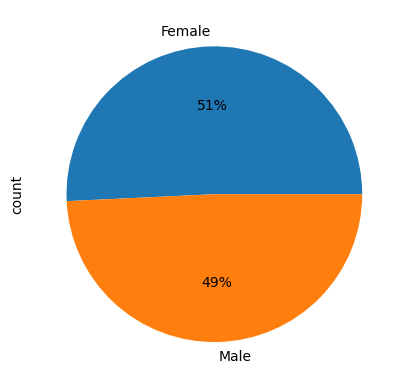

In [244]:
# a simple pie chart showing the percentage of male and female  
med_df.gender.value_counts().plot(kind='pie', autopct='%1.0f%%')


From the bar chart above, it's obvious that more female were admitted than male, with no much difference.
This shows that there's a good balance between both gender overall.

### Research Question 2 (Which year has the highest number of admissions rate?)

By comparing the admission rates for each year, we can determine if the number of admitted patients has increased or decreased over time.

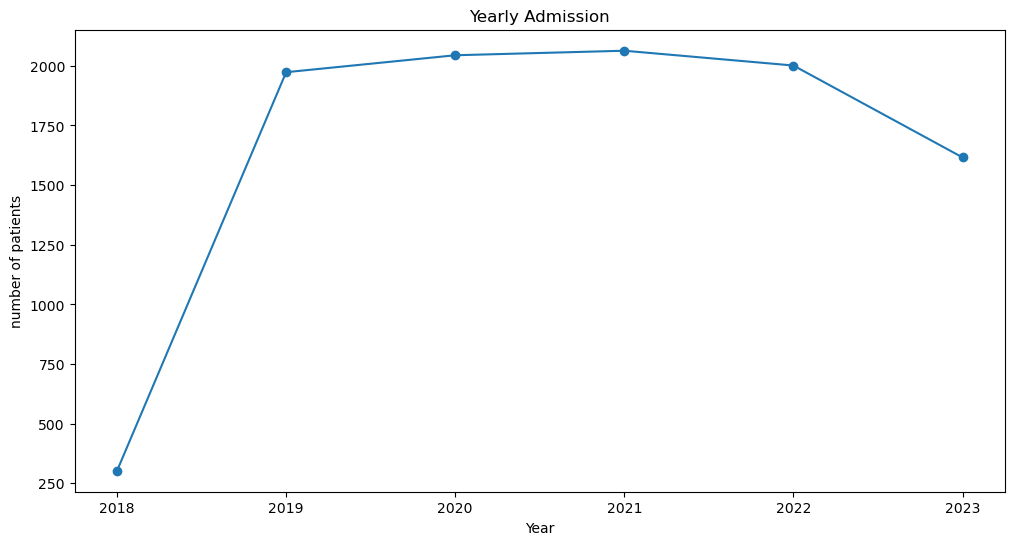

In [245]:
# before creating the chart we have to extract the year from the 'date_of_admission' column
med_df['year'] = med_df['date_of_admission'].dt.year

#to Group the data by the year column and perform any necessary aggregation on the 'name' column 
yearly_data = med_df.groupby('year').agg({'name': 'count'}).reset_index()

plt.figure(figsize=(12, 6))

#to plot the line chart using Matplotlib
plt.plot(yearly_data['year'], yearly_data['name'], marker='o', markersize=6)
plt.xlabel('Year')
plt.ylabel('number of patients')
plt.title('Yearly Admission')
plt.show()


 Upon closer examination of the chart, it becomes apparent that there is a discernible trend of rising patient admissions spanning from 2018 to 2021. Notably, 2021 emerges as the peak year, indicating a consistent annual increase in admissions. However, there is a subtle decline noted from 2021 to 2023.

### Research Question 3 (What insurance company spent the most money?)
We would like to know what insurance company spent the most money over the last year, to know the insurance company with the highest and least spending

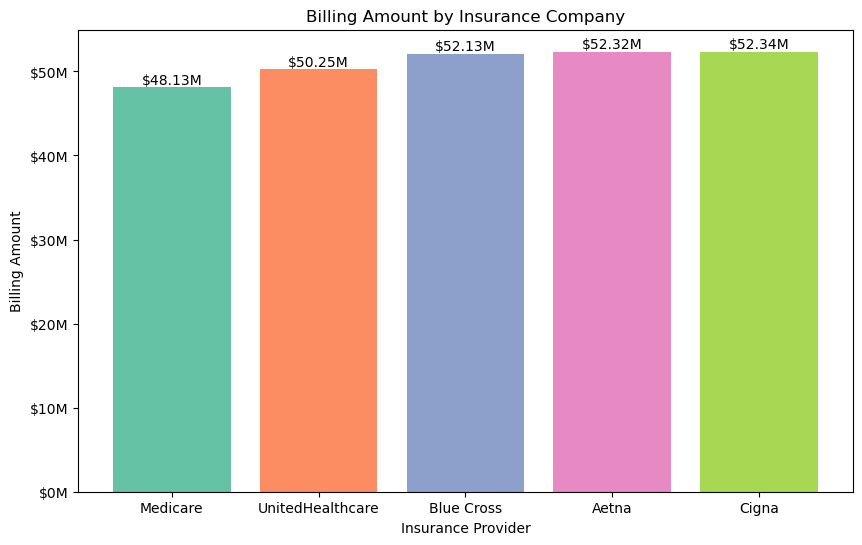

In [246]:
# Group by insurance company and sum the billing amounts, then sort by billing amount in ascending order
grouped_data = med_df.groupby('insurance_provider')['billing_amount'].sum().reset_index().sort_values(by='billing_amount')

# Create a color palette with different colors for each bar
colors = sns.color_palette('Set2', n_colors=len(grouped_data))

# Set figure size
plt.figure(figsize=(10, 6))

# Create a bar chart
ax = plt.bar(grouped_data['insurance_provider'], grouped_data['billing_amount'], color=colors)

#To add amount on top of each bar
for i, p in enumerate(ax):
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), f'${round(p.get_height() / 1000000, 2)}M', ha='center', va='bottom')

plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.title('Billing Amount by Insurance Company')

# Function to format y-axis labels in millions with dollar sign
def millions_formatter(x, pos):
    return f'${x / 1000000:.0f}M'

# Apply formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

From 2019 to 2023, different insurance providers spent varying amounts on healthcare services. 'Medicore' spent around 48.13M, 'UnitedHealthcare' spent 50.25M, 'Blue Cross' allocated 52.13M, 'Aetna' spent 52.32M, and 'Cigna' led the way with 52.34M, showing their commitment to innovation and personalized care in healthcare."

### Research Question 4( What is the percentage of Medical condition per Blood type?)
we would like to calculate the percentage of each medical condition within each blood type category. This analysis will give us insights into the distribution of medical conditions across different blood types.

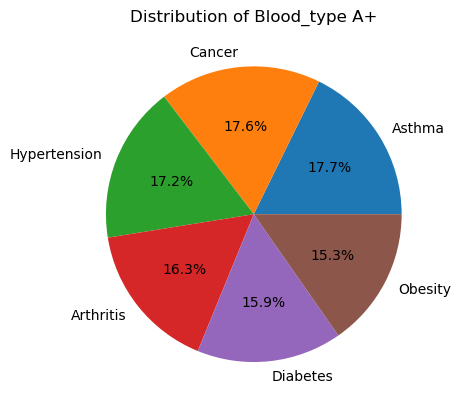

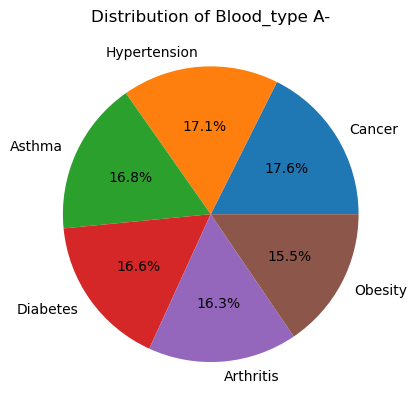

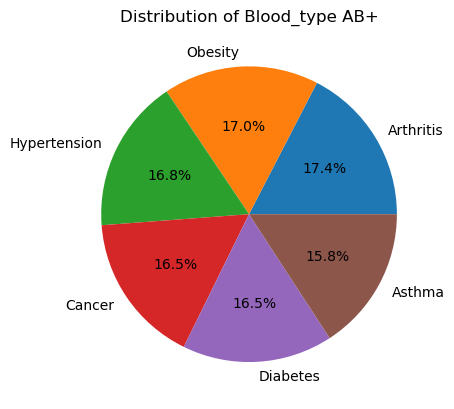

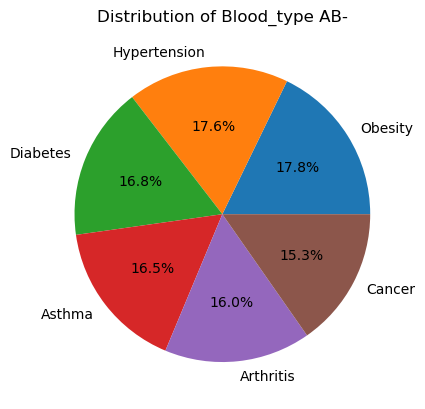

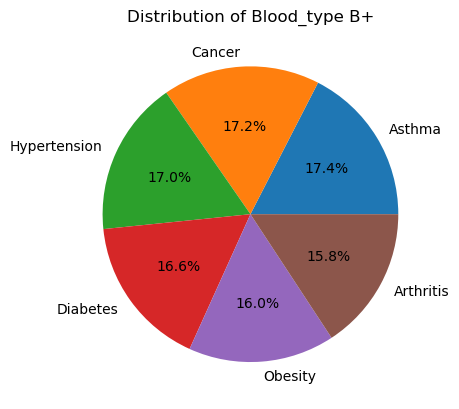

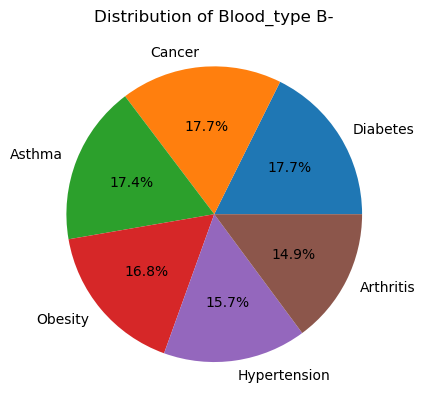

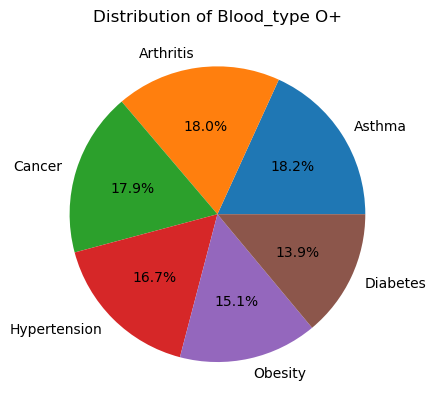

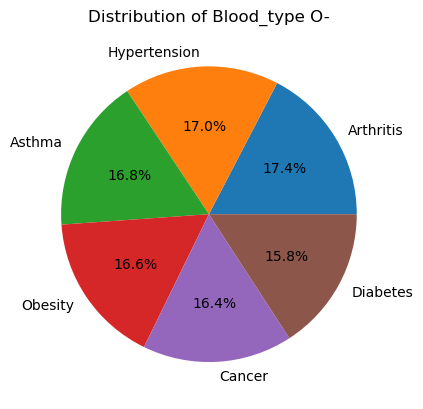

In [247]:
#To Group the DataFrame by 'blood_type' and count the values in 'medical_condition'
grouped = med_df.groupby('blood_type')['medical_condition'].value_counts()

# To Plot pie charts for each group in 'blood_type'
for group_name, group_data in grouped.groupby(level=0):
    plt.figure()
    plt.pie(group_data, labels=group_data.index.get_level_values(1), autopct='%1.1f%%')
    plt.title(f'Distribution of Blood_type {group_name}')

plt.show()



From the above chart, we can conclude that blood type does not appear to be correlated with medical condition. The percentages of medical conditions across different blood types ranged from 13% to 19%, showing little variation and no clear pattern. This lack of consistency suggests that blood type does not significantly influence the prevalence of medical conditions.

### Question 5( what is the most common admission type received over the year?)
We are looking for insight into the predominant type of admissions observed across a span of time. 

In [248]:
med_df.admission_type.value_counts()

admission_type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64

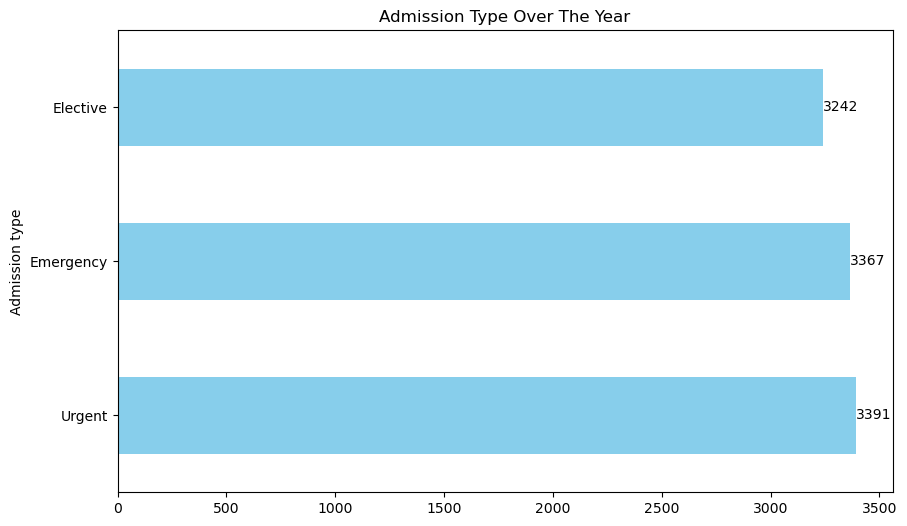

In [249]:
#to Calculate value counts
value_counts = med_df['admission_type'].value_counts()

#to Plot horizontal bar chart using the plot function
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
value_counts.plot(kind='barh', color='skyblue')
plt.title('Admission Type Over The Year')
plt.xlabel('')
plt.ylabel('Admission type')

# Add value counts on each bar
for i, count in enumerate(value_counts):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

Throughout the span of several years, hospitals have consistently witnessed the highest influx of patients opting for 'Urgent' admission types, totaling 3391 admissions. Following closely behind is the 'Emergency' admission category, which recorded 3367 admissions, representing a marginal difference of 24 admissions compared to 'Urgent'. Notably, the 'Elective' admission type trails with 3242 admissions, registering 125 admissions fewer than the 'Emergency' category. This data underscores the prevalence of urgent and emergency medical needs, shedding light on the priorities and demands within healthcare services over the observed period.

### Question 6( What's the Test results by Admission Type?)
We would like to know the relationship between test results and the different types of patient admissions within a healthcare context over the years. This query implies a desire to understand how various admission types, such as urgent, emergency, or elective, may correlate with the outcomes of medical tests administered to patients.

<Figure size 1000x800 with 0 Axes>

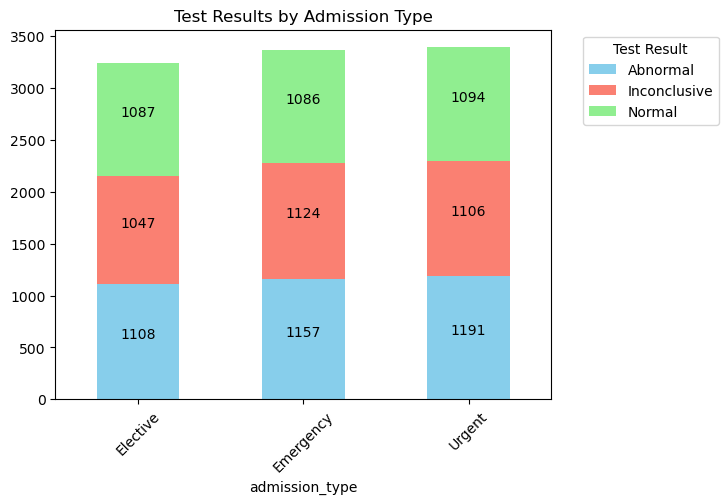

In [250]:
# To Calculate the value counts of test_results for each admission type
grouped = med_df.groupby(['admission_type', 'test_results']).size().unstack(fill_value=0)

# Plot the stacked bar chart with the plot function
plt.figure(figsize=(10, 8))
grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Test Results by Admission Type')
plt.xticks(rotation=45)  
plt.legend(title='Test Result')

plt.legend(title='Test Result', bbox_to_anchor=(1.05, 1), loc='upper left')


for idx, col in enumerate(grouped.columns):
    for i, val in enumerate(grouped[col]):
        plt.text(i, grouped.iloc[:, :idx].sum(axis=1)[i] + val / 2, str(val), ha='center', va='bottom')
        
plt.show()

Across all three admission types (Elective, Emergency, and Urgent), the count of abnormal test results is the highest compared to inconclusive and normal test results.
While there are variations in the counts of test results across admission types, the distribution of abnormal, inconclusive, and normal test results remains relatively consistent. For example, the difference in counts between abnormal, inconclusive, and normal test results is not significantly skewed towards any specific admission type.


### Conclusions


A couple of useful insights were drawn from the questions posed earlier at the top of the page which are as follows:
>Which gender has the highest admission rate over the years: More females were admitted compared to males, though the difference is minimal. This suggests a relatively even distribution between genders overall.

>Which months have the highest number of admissions each year?: This reveals a clear upward trend in patient admissions from 2018 to 2021, peaking in 2021. There is a slight decrease in admissions from 2021 to 2023.

>Which insurance company has the highest spending? 
Between 2019 and 2023, various insurance providers allocated different budgets to healthcare services. 'Medicore' invested a substantial amount, while 'UnitedHealthcare' contributed slightly more. 'Blue Cross' and 'Aetna' each spent a significant amount, with 'Cigna' topping the list, reflecting their dedication to innovation and personalized healthcare.

> Percentage of Medical condition per Blood Type: it is evident that there is no clear link between blood type and medical condition. The percentages of medical conditions across various blood types remained between 13% and 19%, indicating minimal variation and no discernible pattern. This suggests that blood type does not play a major role in the occurrence of medical conditions.


> Over the course of several years, hospitals have consistently seen the largest number of patients choosing 'Urgent' admission types. Close in numbers is the 'Emergency' category, with only a small difference in admissions compared to 'Urgent'. Meanwhile, 'Elective' admissions trail behind the other types, with notably fewer admissions than 'Emergency'. This data highlights the prominence of urgent and emergency medical needs, offering insight into the priorities and pressures within healthcare services over the given period.

> Our analysis on the Admisssion type by Test resultreveals that there is no clear relationship between blood type and medical condition. The percentages of medical conditions across different blood types remained relatively consistent, ranging from 15% to 18%. This lack of variation suggests that blood type does not significantly influence the prevalence of medical conditions. Future research could explore other potential factors that may play a role in determining medical conditions.

In [254]:
med_df.to_csv('medfinal.csv')